## Descripció

Familiaritza't amb la programació científica mitjantçant la llibreria SKLearn / Scikitlearn.

## Nivell 1

**- Exercici 1:**
Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
%matplotlib inline   

Carreguem i netegem el dataframe de valors nuls o no útils:

In [2]:
flights2008_df=pd.read_csv('DelayedFlights.csv', index_col=0)

C:\Users\march\AppData\Roaming\Python\Python37\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
flights2008_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936758 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [4]:
flights2008_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

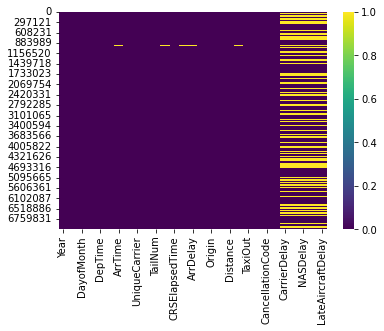

In [5]:
sns.heatmap(flights2008_df.isnull(),cmap='viridis') #visualització gràfica dels valors nuls

In [6]:
flights2008_df.isnull().sum() #detalls dels nuls específics:

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

Mostra clarament que on hi manca força informació és en reportar els **minuts de retràs per cada causa**. De 1936758 entrades en fallen 689270 (35,6% del total).
Hi han alguns registres que li falta la **hora d'arribada real**, amb el que no es pot treballar amb les dades de retrasos. Elimino aquests registres (7110) ja que només suposen el 0,37% de les dades totals. 

In [7]:
indexDel=list(flights2008_df[flights2008_df['ArrTime'].isnull()].index)#index de les línees que s'han de borrar
flights2008_df.drop(indexDel, inplace=True)

In [8]:
flights2008_df.drop('Year',axis=1,inplace=True) #Eliminem columna any ja que no té sentit ja que totes les dades són del 2008
flights2008_df.isnull().sum() #detalls dels nuls específics:

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   3
ActualElapsedTime      1277
CRSElapsedTime            0
AirTime                1277
ArrDelay               1277
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         682160
WeatherDelay         682160
NASDelay             682160
SecurityDelay        682160
LateAircraftDelay    682160
dtype: int64

Canviem el valor del número d'avió (TailNum) a 'Unkown' pels 3 registres que no el tenen definit.

In [9]:
flights2008_df['TailNum'].fillna(value='Unknown',inplace=True)

Eliminem també les que falten dades de temps de vol o retràs en l'arrivada que manquen i són molt poques respecte el total.

In [10]:
indexDel=list(flights2008_df[flights2008_df['AirTime'].isnull()].index)#index de les línees que s'han de borrar
flights2008_df.drop(indexDel, inplace=True)
flights2008_df.isnull().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

In [11]:
flights2008_df.groupby('Cancelled').count()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Distance,TaxiIn,TaxiOut,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Cancelled,,,,,,,,,,,,,,,,,,,,,
0,1928371,1928371,1928371,1928371,1928371,1928371,1928371,1928371,1928371,1928371,...,1928371,1928371,1928371,1928371,1928371,1247488,1247488,1247488,1247488,1247488


In [12]:
flights2008_df.groupby('Diverted').count()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Diverted,,,,,,,,,,,,,,,,,,,,,
0,1928371,1928371,1928371,1928371,1928371,1928371,1928371,1928371,1928371,1928371,...,1928371,1928371,1928371,1928371,1928371,1247488,1247488,1247488,1247488,1247488


Al netejar el dataframe no queden vols cancelats. Es poden borrar totes les columnes referents a la cancelació i desviació de vols.

In [13]:
flights2008_df.drop(['Cancelled','CancellationCode', 'Diverted'],axis=1,inplace=True)

Finalment, canviem els nuls per unknown pel que fa a les causes del retràs:

In [14]:
for i in ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']:
    flights2008_df[i].fillna(value='Unknown',inplace=True)

In [15]:
flights2008_df.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

<AxesSubplot:>

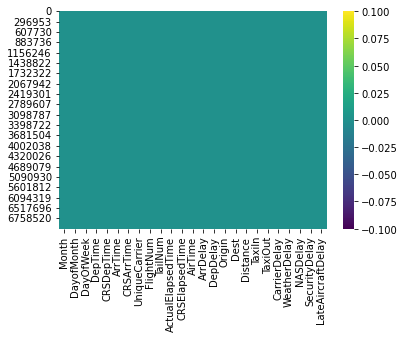

In [16]:
sns.heatmap(flights2008_df.isnull(),cmap='viridis') #visualització gràfica dels valors nuls

Generarem la **columna objectiu** que a la vegada serà una columna dummie, ja que dirà si hi ha retràs o no.

In [17]:
flights2008_df['Delayed']=flights2008_df['ArrTime']>flights2008_df['CRSArrTime'] #Generem columna de si hi ha retràs (=True) o no (False)

In [18]:
flights2008_df.groupby('Delayed').count()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Delayed,,,,,,,,,,,,,,,,,,,,,
False,280464,280464,280464,280464,280464,280464,280464,280464,280464,280464,...,280464,280464,280464,280464,280464,280464,280464,280464,280464,280464
True,1647907,1647907,1647907,1647907,1647907,1647907,1647907,1647907,1647907,1647907,...,1647907,1647907,1647907,1647907,1647907,1647907,1647907,1647907,1647907,1647907


In [19]:
flights2008_df['Delayed']=np.where(flights2008_df['Delayed']==True,np.uint8(1),np.uint8(0)) #Canvio a Dummie

In [20]:
flights2008_df.groupby('Delayed').count()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Delayed,,,,,,,,,,,,,,,,,,,,,
0,280464,280464,280464,280464,280464,280464,280464,280464,280464,280464,...,280464,280464,280464,280464,280464,280464,280464,280464,280464,280464
1,1647907,1647907,1647907,1647907,1647907,1647907,1647907,1647907,1647907,1647907,...,1647907,1647907,1647907,1647907,1647907,1647907,1647907,1647907,1647907,1647907


Ara ja podem fer la divisió de valors objectius i la resta del dataframe en test i train subsets.

In [21]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
y=flights2008_df.Delayed #prenem paràmetre de retràs (si=True/no=False) com l'objectiu
X=flights2008_df.iloc[:,:-1] #tots els altres paràmetres estan en X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1292008, 25) (636363, 25) (1292008,) (636363,)


In [22]:
flights2008_df.DayofMonth.nunique()

31

Training set


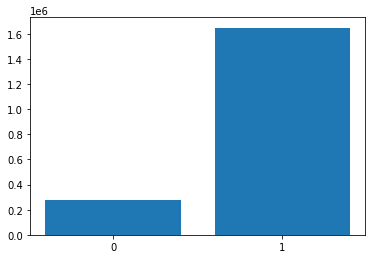

0 14.544089285723546
1 85.45591071427646
Testing set


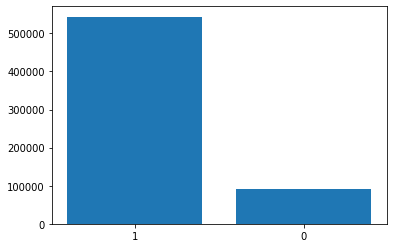

1 85.44478544478544
0 14.555214555214555


In [23]:
import math
def plot_class_dist(data):#data should be categorical parameter
    dict = Counter(data)
    names = list(dict.keys())
    values = list(dict.values())
    plt.bar(range(len(dict)), values, tick_label=names)
    plt.show()
    for j in names:
        print(j,100*dict[j]/sum(values))
        
print ('Training set')
plot_class_dist(y)
   
print ('Testing set')
plot_class_dist(y_test)  
    


En fem un estudi estadístic emprant la funció describe() per els 4 subsets de dades generats:

In [24]:
X.describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
count,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06
mean,6.107855e+00,1.575206e+01,3.984999e+00,1.518648e+03,1.467718e+03,1.610242e+03,1.634196e+03,2.184296e+03,1.333059e+02,1.341977e+02,1.082771e+02,4.219988e+01,4.309169e+01,7.649486e+02,6.811388e+00,1.821733e+01
std,3.480753e+00,8.776566e+00,1.996050e+00,4.504352e+02,4.247281e+02,5.480009e+02,4.646284e+02,1.944450e+03,7.206007e+01,7.123339e+01,6.864261e+01,5.678472e+01,5.326600e+01,5.738858e+02,5.268051e+00,1.430838e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.100000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.110000e+02,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.423000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.970000e+02,8.000000e+00,2.100000e+01
max,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,9.741000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02


In [25]:
X_test.describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
count,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000,636363.00000,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000,636363.000000
mean,6.102539,15.758026,3.981668,1519.360645,1468.134961,1610.672505,1634.692163,2182.862574,133.34736,134.246964,108.306666,42.264585,43.164185,765.322732,6.811001,18.229693
std,3.477453,8.776456,1.997498,450.218653,424.507062,548.392538,464.613783,1944.694002,72.05096,71.255998,68.632221,56.998879,53.496259,574.050152,5.284719,14.279954
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,15.00000,15.000000,0.000000,-63.000000,6.000000,24.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,1204.000000,1135.000000,1317.000000,1325.000000,610.000000,80.00000,82.000000,58.000000,9.000000,12.000000,338.000000,4.000000,10.000000
50%,6.000000,16.000000,4.000000,1546.000000,1510.000000,1716.000000,1707.000000,1541.000000,116.00000,116.000000,90.000000,24.000000,24.000000,606.000000,6.000000,14.000000
75%,9.000000,23.000000,6.000000,1900.000000,1815.000000,2030.000000,2015.000000,3421.000000,165.00000,165.000000,137.000000,56.000000,53.000000,998.000000,8.000000,21.000000
max,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2359.000000,9741.000000,727.00000,660.000000,649.000000,2461.000000,2467.000000,4962.000000,207.000000,376.000000


In [26]:
y.describe()

count    1.928371e+06
mean     8.545591e-01
std      3.525449e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: Delayed, dtype: float64

In [27]:
y_test.describe()

count    636363.000000
mean          0.854448
std           0.352657
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Delayed, dtype: float64

Podem comprovar que els valors promitjos dels paràmetres són molt propers pel conjunt de training i pel de testatge.

## Nivell 2

**- Exercici 2:**
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

A l'exercici 1 ja he fet algun canvi per generar la columna objectiu com a columna dummie. Procedeixo a **generar columnes dummie per les variables categòriques**:

In [28]:
flights2008_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928371 entries, 0 to 7009727
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   UniqueCarrier      object 
 8   FlightNum          int64  
 9   TailNum            object 
 10  ActualElapsedTime  float64
 11  CRSElapsedTime     float64
 12  AirTime            float64
 13  ArrDelay           float64
 14  DepDelay           float64
 15  Origin             object 
 16  Dest               object 
 17  Distance           int64  
 18  TaxiIn             float64
 19  TaxiOut            float64
 20  CarrierDelay       object 
 21  WeatherDelay       object 
 22  NASDelay           object 
 23  SecurityDelay      object 
 24  LateAircraftDelay  object 
 25  Delayed           

In [29]:
flights2008_df.Origin.nunique()

303

Columne Dummie per dies de la setmana i del mes:

In [30]:
DayOfWeek_dum= pd.get_dummies(flights2008_df.DayOfWeek)
DayOfWeek_dum.columns=['Mon','Twe','Wed','Thu','Fri','Sat','Sun']

Month_dum= pd.get_dummies(flights2008_df.Month)
Month_dum.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov', 'Dec']

Columnes Dummie per origen i destinació:

In [31]:
Origin_dum= pd.get_dummies(flights2008_df.Origin)
Origin_dum.head()

,ABE,ABI,ABQ,ABY,ACK,ACT,ACV,ACY,ADK,ADQ,...,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
Dest_dum= pd.get_dummies(flights2008_df.Dest)
Dest_dum.head()


,ABE,ABI,ABQ,ABY,ACK,ACT,ACV,ACY,ADK,ADQ,...,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
UniqueCarrier_dum= pd.get_dummies(flights2008_df.UniqueCarrier)
UniqueCarrier_dum.head()

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
DayOfWeek_dum.Mon

0          0
1          0
2          0
4          0
5          0
          ..
7009710    0
7009717    0
7009718    0
7009726    0
7009727    0
Name: Mon, Length: 1928371, dtype: uint8

Genero la columna de velocitat mitja de cada vol:
    

In [35]:
flights2008_df['AverageSpeed']=flights2008_df['Distance']/(flights2008_df['AirTime']/60)#Dividim entre 60 perquè són minuts i volem per hora
flights2008_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928371 entries, 0 to 7009727
Data columns (total 27 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   UniqueCarrier      object 
 8   FlightNum          int64  
 9   TailNum            object 
 10  ActualElapsedTime  float64
 11  CRSElapsedTime     float64
 12  AirTime            float64
 13  ArrDelay           float64
 14  DepDelay           float64
 15  Origin             object 
 16  Dest               object 
 17  Distance           int64  
 18  TaxiIn             float64
 19  TaxiOut            float64
 20  CarrierDelay       object 
 21  WeatherDelay       object 
 22  NASDelay           object 
 23  SecurityDelay      object 
 24  LateAircraftDelay  object 
 25  Delayed           

In [36]:
DayofMonth_dum= pd.get_dummies(flights2008_df.DayofMonth)
DayofMonth_dum.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Estandadirtzo les següents dades numèriques**: Distància , temps de retards variats i velocitat mitjana del data frame que només inclou els vols on s'han reportat els temps de retras per diferents causes:

In [37]:
flights2008_df_delays=flights2008_df[(flights2008_df.CarrierDelay!='Unknown') ].copy()

In [38]:
#Canvio el format de les dades a integer (de str-->int)
for i in ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']:
    flights2008_df_delays[i]=flights2008_df_delays[i].apply(lambda x: int(x))

In [39]:
flights2008_df_delays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247488 entries, 4 to 7009718
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Month              1247488 non-null  int64  
 1   DayofMonth         1247488 non-null  int64  
 2   DayOfWeek          1247488 non-null  int64  
 3   DepTime            1247488 non-null  float64
 4   CRSDepTime         1247488 non-null  int64  
 5   ArrTime            1247488 non-null  float64
 6   CRSArrTime         1247488 non-null  int64  
 7   UniqueCarrier      1247488 non-null  object 
 8   FlightNum          1247488 non-null  int64  
 9   TailNum            1247488 non-null  object 
 10  ActualElapsedTime  1247488 non-null  float64
 11  CRSElapsedTime     1247488 non-null  float64
 12  AirTime            1247488 non-null  float64
 13  ArrDelay           1247488 non-null  float64
 14  DepDelay           1247488 non-null  float64
 15  Origin             1247488 non-n

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
data = flights2008_df_delays.values[:,[10,11,12,13,17,18,19,20,21,22,23,24]].copy()#agafem els valors a normalitzar i els transformem

In [45]:
data = scaler.fit_transform(data)
# convertir l'array en un dataframe i l'incorporem a un nou dataframe que conté afegides les columnes amb valors estandaritzats
dataset_ = pd.DataFrame(data, columns=list(flights2008_df_delays.iloc[:, [10,11,12,14,17,18,19,20,21,22,23,24]].columns))
dataset_.head()


,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,-0.627666,-0.600645,-0.446212,-0.482127,-0.405079,-0.712261,-0.639117,-0.394510,-0.172316,-0.443993,-0.044562,0.159400
1,1.447130,1.700456,1.798030,-0.103552,1.518536,-0.712261,-0.818975,-0.210797,-0.172316,-0.443993,-0.044562,0.516077
2,-0.198874,0.046539,-0.006165,0.275023,0.154486,-0.215015,-0.759022,-0.256725,-0.172316,-0.443993,-0.044562,1.110539
3,1.281146,1.556637,1.548669,-0.794864,1.336185,-0.049266,-0.759022,-0.371546,-0.172316,-0.443993,-0.044562,-0.316170
4,-0.171210,0.046539,0.037840,-0.778404,0.172363,-0.546512,-0.699069,-0.440438,-0.172316,-0.443993,-0.044562,-0.221056


In [46]:
flights2008_df_delays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247488 entries, 4 to 7009718
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Month              1247488 non-null  int64  
 1   DayofMonth         1247488 non-null  int64  
 2   DayOfWeek          1247488 non-null  int64  
 3   DepTime            1247488 non-null  float64
 4   CRSDepTime         1247488 non-null  int64  
 5   ArrTime            1247488 non-null  float64
 6   CRSArrTime         1247488 non-null  int64  
 7   UniqueCarrier      1247488 non-null  object 
 8   FlightNum          1247488 non-null  int64  
 9   TailNum            1247488 non-null  object 
 10  ActualElapsedTime  1247488 non-null  float64
 11  CRSElapsedTime     1247488 non-null  float64
 12  AirTime            1247488 non-null  float64
 13  ArrDelay           1247488 non-null  float64
 14  DepDelay           1247488 non-null  float64
 15  Origin             1247488 non-n

In [47]:
flights2008_df_delays.ArrDelay.isnull().unique()

array([False])

In [48]:
dataset_['ArrDelay']=list(flights2008_df_delays.ArrDelay)

In [49]:
dataset_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247488 entries, 0 to 1247487
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ActualElapsedTime  1247488 non-null  float64
 1   CRSElapsedTime     1247488 non-null  float64
 2   AirTime            1247488 non-null  float64
 3   DepDelay           1247488 non-null  float64
 4   Distance           1247488 non-null  float64
 5   TaxiIn             1247488 non-null  float64
 6   TaxiOut            1247488 non-null  float64
 7   CarrierDelay       1247488 non-null  float64
 8   WeatherDelay       1247488 non-null  float64
 9   NASDelay           1247488 non-null  float64
 10  SecurityDelay      1247488 non-null  float64
 11  LateAircraftDelay  1247488 non-null  float64
 12  ArrDelay           1247488 non-null  float64
dtypes: float64(13)
memory usage: 123.7 MB


In [50]:
dataset_.to_csv('fligth_delays_norm.csv') #el salvem per la 2a part del Sprint

Genero columnes Dummie en funció de l'hora del dia:
    

In [51]:
flights2008_df['CRS_Dep_Hour']= flights2008_df.CRSDepTime.apply(lambda x: int(x/100))
CRS_Dep_Hour_dum= pd.get_dummies(flights2008_df.CRS_Dep_Hour)
flights2008_df.drop(columns ='CRS_Dep_Hour',inplace=True)

## Nivell 3

**- Exercici 3:**
Resumeix les noves columnes generades de manera estadística i gràfica

Distribució de les columnes dummies generades a partir de la destinació i l'origen:

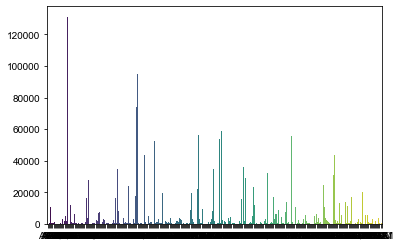

In [52]:
sns.barplot(x=Origin_dum.sum().index, y=Origin_dum.sum().values,palette='viridis')
sns.set(rc = {'figure.figsize':(20,14)})

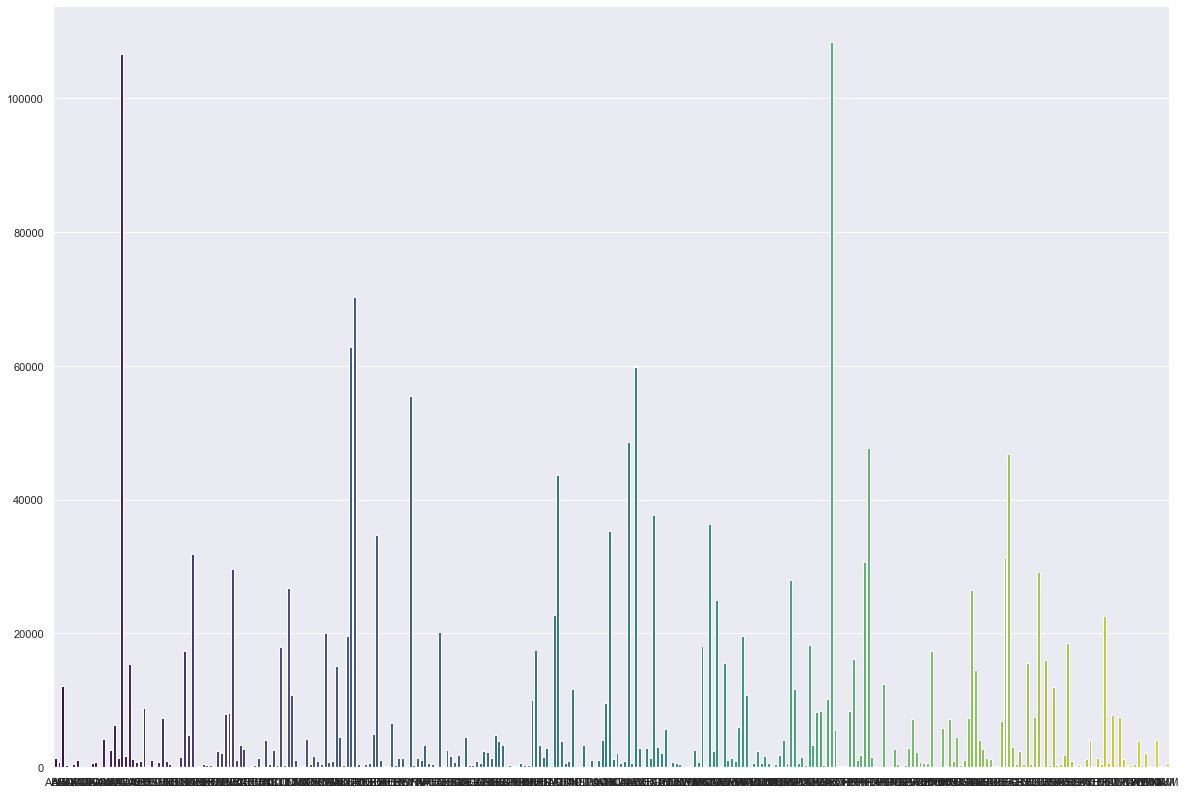

In [53]:
sns.barplot(x=Dest_dum.sum().index, y=Dest_dum.sum().values,palette='viridis')
sns.set(rc = {'figure.figsize':(20,14)})

Distribució de les columnes dummies generades a partir del dia del mes:

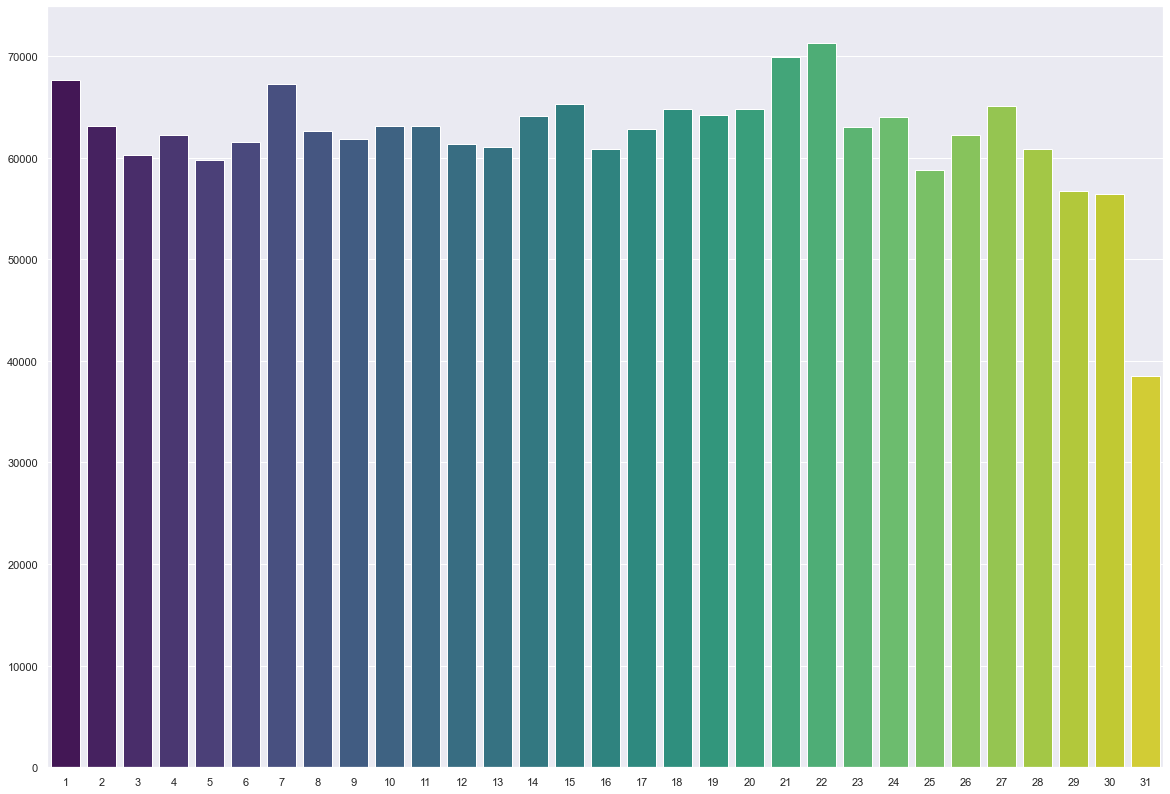

In [54]:
sns.barplot(x=DayofMonth_dum.sum().index, y=DayofMonth_dum.sum().values,palette='viridis')
sns.set(rc = {'figure.figsize':(20,14)})

Distribució de les columnes dummies generades a partir del dia de la setmana:

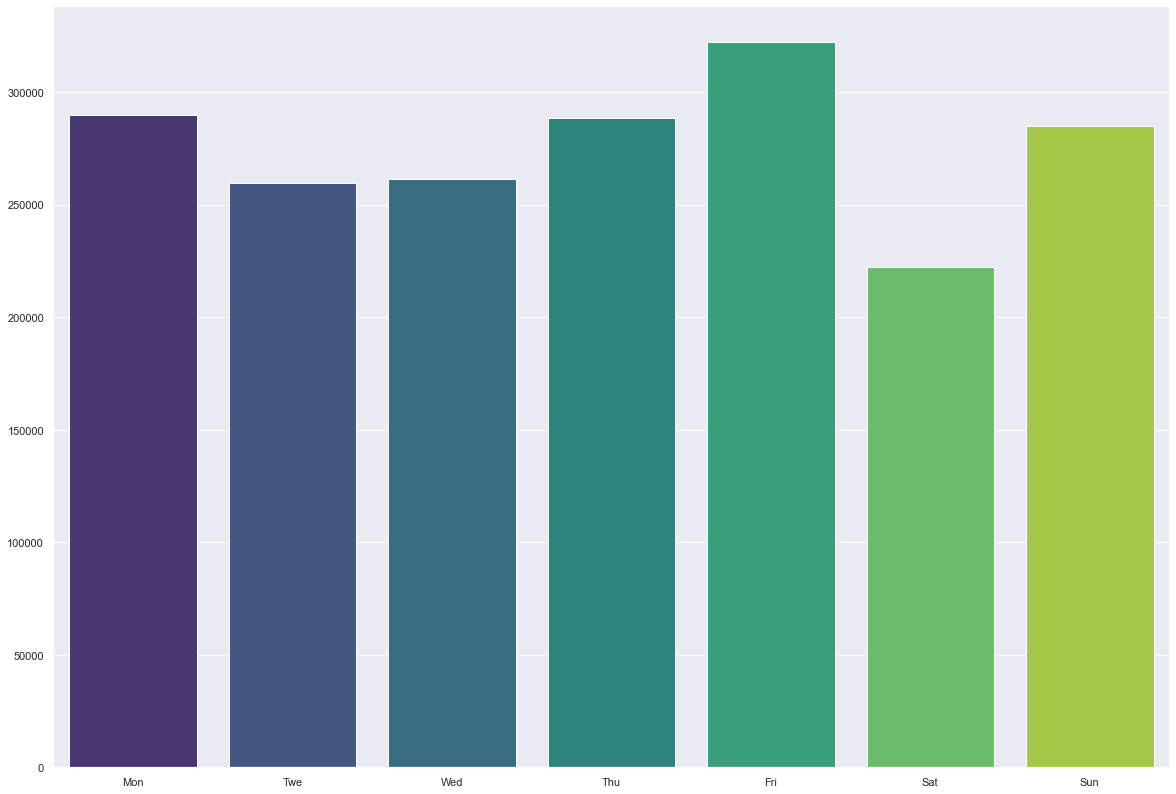

In [55]:
sns.barplot(x=DayOfWeek_dum.sum().index, y=DayOfWeek_dum.sum().values,palette='viridis')
sns.set(rc = {'figure.figsize':(20,14)})

Distribució de les columnes dummies generades a partir de l'hora del dia:

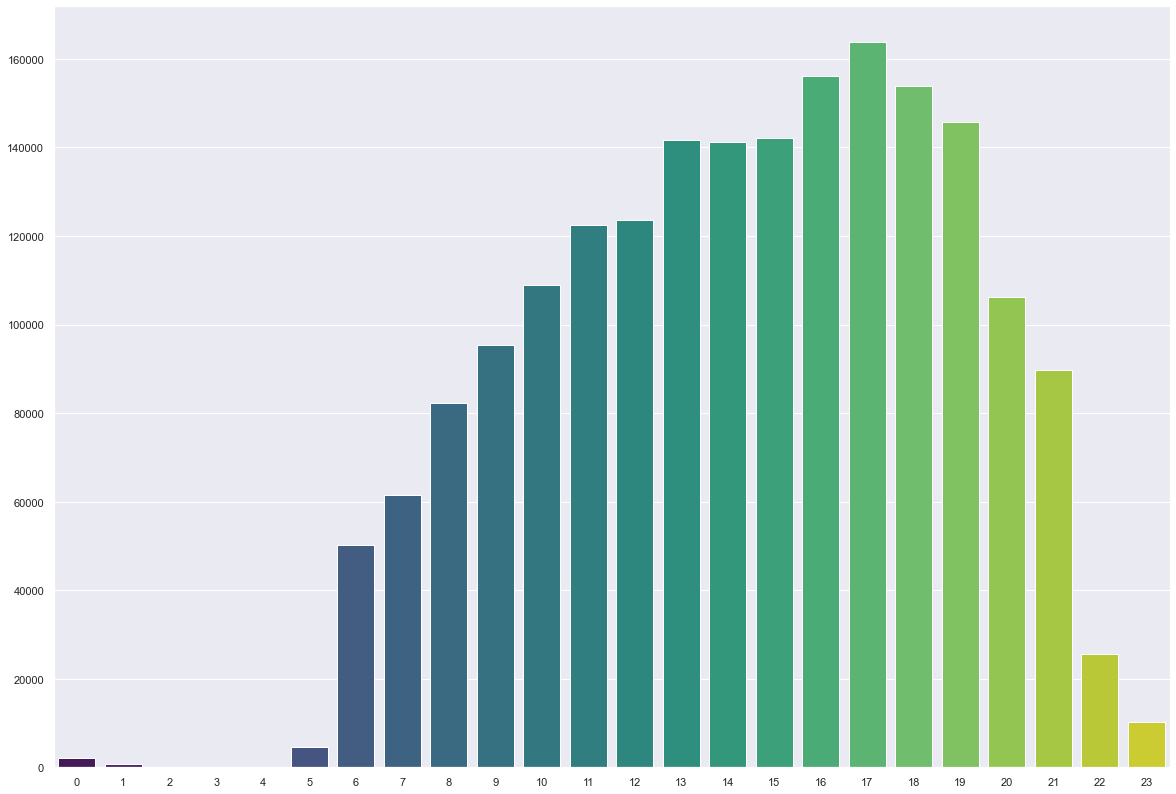

In [56]:
sns.barplot(x=CRS_Dep_Hour_dum.sum().index, y=CRS_Dep_Hour_dum.sum().values,palette='viridis')
sns.set(rc = {'figure.figsize':(20,14)})


Respecte la nova columna nova de velocitat mitjana de cada vol, en treim la informació estadística rellevant i una representació gràfica de la seva distribució:

In [57]:
flights2008_df.AverageSpeed.describe()

count    1.928371e+06
mean              inf
std               NaN
min      2.129032e+01
25%      3.518644e+02
50%      4.038202e+02
75%      4.481481e+02
max               inf
Name: AverageSpeed, dtype: float64

Passa quelcom amb les dades perquè la desviació estandard dona malament i la mitja també. Fem una mica d'exploració i veiem que:


In [58]:
flights2008_df.AirTime[flights2008_df.AirTime==0].count()

7

In [59]:
flights2008_df.AverageSpeed[flights2008_df.AirTime!=0].mean() #velocitat mithana de tots els vols menys els que tenen 0 en temps de vol

396.9526673648614

In [60]:
flights2008_df.AverageSpeed[flights2008_df.AirTime!=0].std() #desviació standard de tots els vols menys els que tenen 0 en temps de vol

97.51458797473988

Hi ha 7 vols on no s'ha registrat el temps de vol (=0). Per aquests vols els hi adjuticarem una velocitat mitjana de 397 (que és la mitjana de la resta de vols).

In [61]:
def remove0 (value):
    x=0
    if value==0:
        x=397
    else:
        x=value
    return x


flights2008_df.AverageSpeed.apply(remove0)

0          418.965517
1          430.088496
2          406.578947
4          401.298701
5          474.482759
              ...    
7009710    453.000000
7009717    370.000000
7009718    338.852459
7009726    359.325843
7009727    504.230769
Name: AverageSpeed, Length: 1928371, dtype: float64

In [62]:
flights2008_df.AverageSpeed.describe() #Extraiem la info estadística rellevant

count    1.928371e+06
mean              inf
std               NaN
min      2.129032e+01
25%      3.518644e+02
50%      4.038202e+02
75%      4.481481e+02
max               inf
Name: AverageSpeed, dtype: float64

Procedim amb la visualització gràfica de la distribució de les velocitats mitjanes:


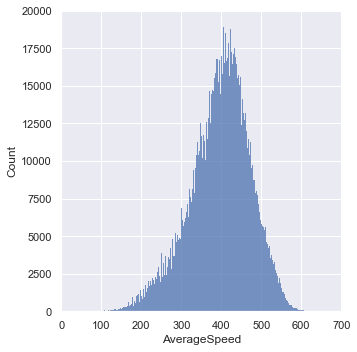

In [63]:
graf_AS=sns.displot(data=flights2008_df.AverageSpeed)
graf_AS.set(xlim=(0,700))
graf_AS.set(ylim=(0,20000))
sns.set(rc = {'figure.figsize':(20,14)})

Representem les distribucions de les dades normalitzades i veiem que és identica a la de les dades inicials:

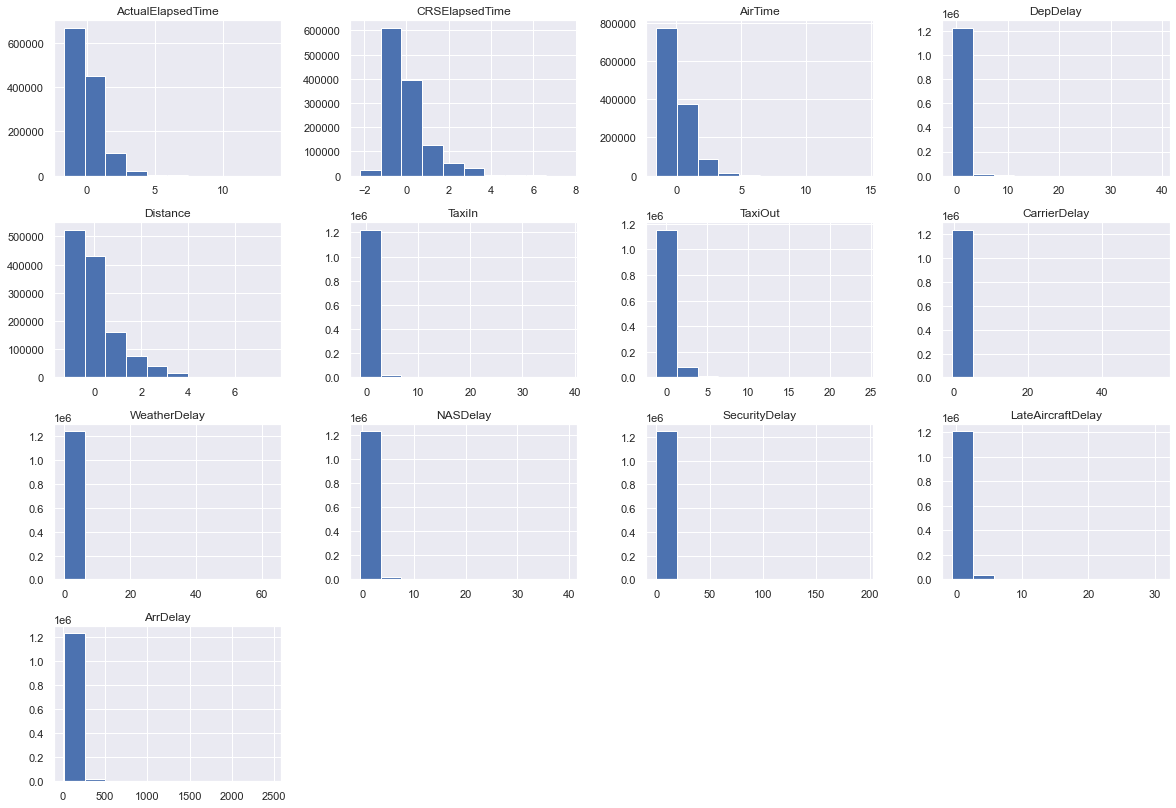

In [64]:
dataset_.hist()
plt.show()

Wall time: 1.76 s


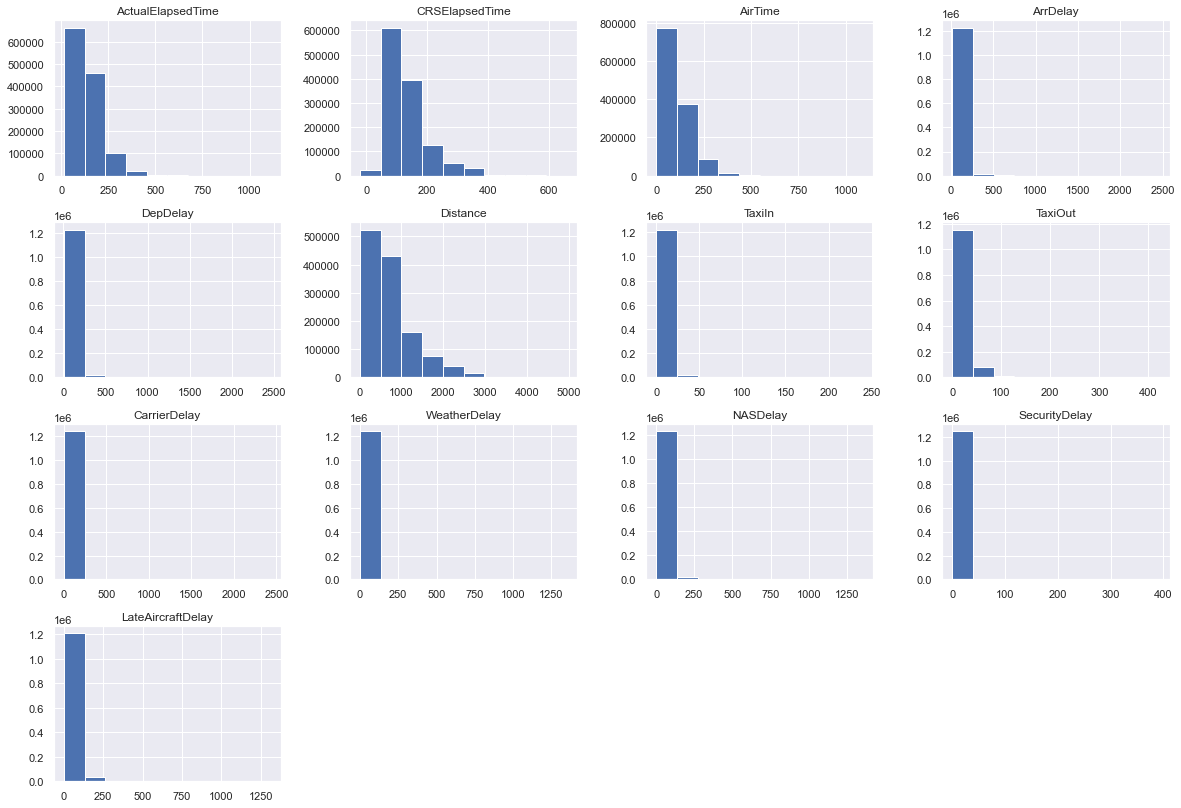

In [65]:
%time flights2008_df_delays.iloc[:,[10,11,12,13,14,17,18,19,20,21,22,23,24]].hist()
plt.show() 